# Business Problem

 Modelos de Machine Learning onde se busca calcular a probabilidade de default (credit score) são abundantes e envolvem problemas de classificação. <br>
No entanto decidir o valor a ser concedido é de suma importância nesta tomada de decisão, intuitivamente tenta-se adequar o valor SOLICITADO com as métricas de risco dos clientes, aprovando, negando ou reduzindo o valor solicitado. <br>
Este projeto busca identificar as características determinantes para o valor das concessões de crédito através de regressões lineares, em modelos de árvore e ensembles.

# Informações Básicas

 Dataset com 30.000 registros e 24 features.

- `Customer ID, Property ID` : Features de identificação do cliente e da propriedade do mesmo.

- `Loan Sanction Amount (USD)` : Feature target, valor da concessão de crédito.
    
- `Age` : Idade em Anos

- `Credit Score` : Score de Crédito.

- `Current Loan Expenses` : Gastos com juros, amortizações ou taxas relacionadas ao empréstimo.

- `Dependents` : Número de dependentes.

- `Expense Type 1 e Type 2` : Sem informação detalhada.

- `Gender` : Gênero, categorias Male ou Female.

- `Has Active Credit Card`: Se possui cartão de crédito.

- `Income (USD)` : Renda

- `Income Stability (USD)` : Estabilidade da renda.

- `Location` : Tipo da localidade do cliente.

- `Loan Amount Request` : Valor da solicitação de concessão.

- `No of Defaults` : Número de defaults passados.

- `Profession`: Profissão

- `Property Type` : Sem dados sobre significado das categorias [1,2,3,4].

- `Property Location` : Localidade do imóvel do cliente.

- `Property Price` : Preço do imóvel.

- `Type of Employment` : Categoria da ocupação do cliente.

# Bibliotecas

In [1]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

# importar algoritmos e metricas
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import GridSearchCV

# filtrar mensagens de warning
import warnings

# formato dos floats
warnings.filterwarnings('ignore')
pd.options.display.float_format = "{:,.2f}".format

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier, RandomForestClassifier

In [2]:
db = pd.read_csv('./loan amount/train.csv', sep=',')

In [3]:
print(db.head().to_string())

  Customer ID               Name Gender  Age  Income (USD) Income Stability Profession     Type of Employment    Location  Loan Amount Request (USD)  Current Loan Expenses (USD) Expense Type 1 Expense Type 2  Dependents  Credit Score  No. of Defaults Has Active Credit Card  Property ID  Property Age  Property Type Property Location  Co-Applicant  Property Price  Loan Sanction Amount (USD)
0     C-36995   Frederica Shealy      F   56      1,933.05              Low    Working            Sales staff  Semi-Urban                  72,809.58                       241.08              N              N        3.00        809.44                0                    NaN          746      1,933.05              4             Rural             1      119,933.46                   54,607.18
1     C-33999  America Calderone      M   32      4,952.91              Low    Working                    NaN  Semi-Urban                  46,837.47                       495.81              N              Y        1

In [4]:
print(80*'*')
print(f'Dimensões: {db.shape[0]} linhas e {db.shape[1]} colunas.\n')
print(80*'*')
print(f'Colunas: {db.columns.values}\n')
print(80*'*')
print('Tipos:', '\n\n'+str(db.dtypes)+'\n')
print(80*'*')
print('Quantidade de valores únicos: ', '\n\n'+str(db.nunique()))
print('\n'+80*'*')
print('Prévia dos valores: \n')
for col in db.columns.values:
  if len(db[col].unique()) > 5:
    print('\n'+col+': ', db[col].unique()[:5], 'entre outros...')
  else:
    print('\n'+col+': ', db[col].unique())

print('\n'+80*'*')
num_but_cat = [col for col in db.columns if db[col].nunique() < 10 and db[col].dtypes != "O"]
cat_but_car = [col for col in db.columns if db[col].nunique() > 20 and db[col].dtypes == "O"]
print('Variáveis numéricas que podem ser categoricas: ', num_but_cat)
print('Variáveis categóricas com cardinalidade: ', cat_but_car)

print('\n'+80*'*')
print('Estatística Descritiva: \n\n', db.describe().to_string(max_cols=db.shape[1]))

********************************************************************************
Dimensões: 30000 linhas e 24 colunas.

********************************************************************************
Colunas: ['Customer ID' 'Name' 'Gender' 'Age' 'Income (USD)' 'Income Stability'
 'Profession' 'Type of Employment' 'Location' 'Loan Amount Request (USD)'
 'Current Loan Expenses (USD)' 'Expense Type 1' 'Expense Type 2'
 'Dependents' 'Credit Score' 'No. of Defaults' 'Has Active Credit Card'
 'Property ID' 'Property Age' 'Property Type' 'Property Location'
 'Co-Applicant' 'Property Price' 'Loan Sanction Amount (USD)']

********************************************************************************
Tipos: 

Customer ID                     object
Name                            object
Gender                          object
Age                              int64
Income (USD)                   float64
Income Stability                object
Profession                      object
Type of Employm

# Missing e Nulos

In [5]:
print('Valores Nulos:', '\n\n'+str((db.isnull().sum()/db.shape[0]).sort_values(ascending=False))+'\n\n')

Valores Nulos: 

Type of Employment            0.24
Property Age                  0.16
Income (USD)                  0.15
Dependents                    0.08
Credit Score                  0.06
Income Stability              0.06
Has Active Credit Card        0.05
Property Location             0.01
Loan Sanction Amount (USD)    0.01
Current Loan Expenses (USD)   0.01
Gender                        0.00
Property Price                0.00
Co-Applicant                  0.00
Property Type                 0.00
Property ID                   0.00
Customer ID                   0.00
No. of Defaults               0.00
Name                          0.00
Expense Type 1                0.00
Loan Amount Request (USD)     0.00
Location                      0.00
Profession                    0.00
Age                           0.00
Expense Type 2                0.00
dtype: float64




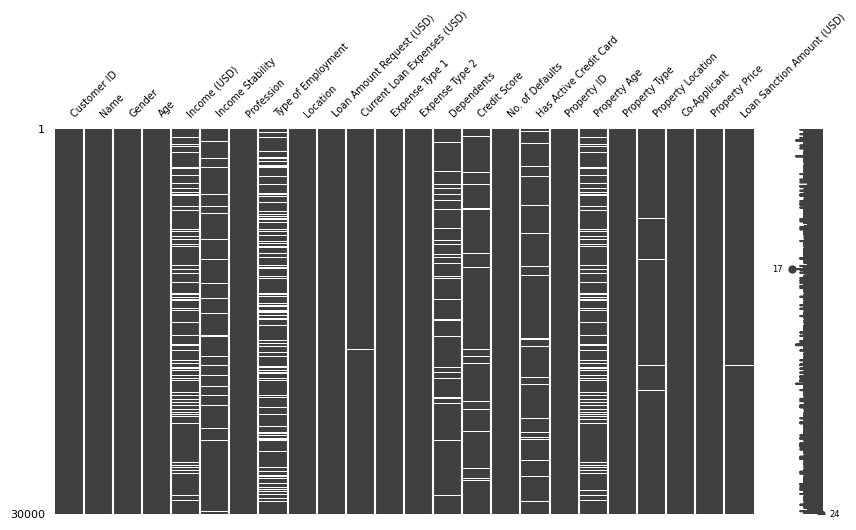

In [6]:
msno.matrix(db, figsize=(10,5), fontsize=7)
plt.show()

 Corrigindo valores inválidos (-999).

In [7]:
#Substituindo -999
minus_999 = ['Current Loan Expenses (USD)', 'Co-Applicant', 'Loan Sanction Amount (USD)', 'Property Price']

for col in minus_999:
    db[col].replace(-999.000,0,inplace=True,regex=True)

In [8]:
# db = db[db['Loan Sanction Amount (USD)'] > 0]

# Análise Univariada

In [9]:
def val_count_views(col):
  df = pd.concat([col.value_counts(normalize=True, dropna=False),
                  col.value_counts(dropna=False)],
                  axis=1,
                  keys=('perc','count'))

  return df

In [10]:
def info_boxplot(db, feature, clean_outlier=False):

  if clean_outlier:

    outlier_limit = db[feature].mean() + (3*db[feature].std())

    df_describe = pd.concat([db[feature].describe(), db[db[feature].abs() <= outlier_limit][feature].describe()], axis = 1, keys=('all_data', 'no_outlier'))

    df_skewness = pd.DataFrame({'all_data': [db[feature].skew()], 'no_outlier': [db[db[feature].abs() <= outlier_limit][feature].skew()]})

    print('Description:\n{}'.format(df_describe))
    print('*'*50)
    print('Object type:\n{}'.format(db[feature].dtype))
    print('*'*50)
    print('Skewness:\n{}'.format(df_skewness))
    print('*'*50)
    print('Boxplot:')
    fig, axis = plt.subplots(ncols=2, figsize=(6,4))
    sns.boxplot(y=db[feature], ax=axis[0])
    sns.boxplot(y=db[db[feature].abs() <= (outlier_limit)][feature], ax=axis[1])
    axis[0].set_title('All Data')
    axis[1].set_title('No Outlier')
    fig.tight_layout()
    plt.show()
    print('*'*50)

    print('Histogram All Data:')
    fig, ax = plt.subplots(figsize=(10, 4))
    sns.histplot(db[feature], bins=50)
    plt.show()

    print('\nHistogram No Outlier:')
    fig, ax = plt.subplots(figsize=(10, 4))
    sns.histplot(db[db[feature].abs() <= (outlier_limit)][feature], bins=50)
    plt.show()

  else:
    print('Description:\n{}'.format(db[feature].describe()))
    print('*'*50)
    print('Object type:\n{}'.format(db[feature].dtype))
    print('*'*50)
    print('Skewness:\n{}'.format(db[feature].skew()))
    print('*'*50)

    print('Boxplot:')
    fig, ax = plt.subplots(figsize=(2, 4))
    sns.boxplot(y=db[feature])
    plt.title('All Data'.format(feature))
    plt.show()
    print('*'*50)
    print('Histogram All Data:')
    fig, ax = plt.subplots(figsize=(10, 4))
    sns.histplot(db[feature], bins=50)
    plt.show()

## Loan Sanction Amount (target)

Description:
        all_data  no_outlier
count  29,660.00   29,295.00
mean   47,660.73   45,487.85
std    48,209.78   44,250.22
min         0.00        0.00
25%         0.00        0.00
50%    35,209.40   34,374.63
75%    74,261.25   72,557.46
max   481,907.32  192,173.55
**************************************************
Object type:
float64
**************************************************
Skewness:
   all_data  no_outlier
0      1.23        0.92
**************************************************
Boxplot:


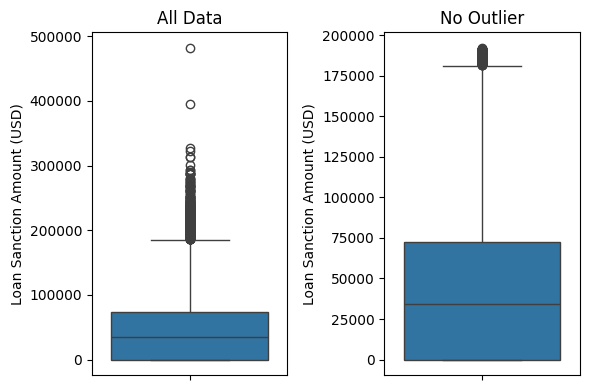

**************************************************
Histogram All Data:


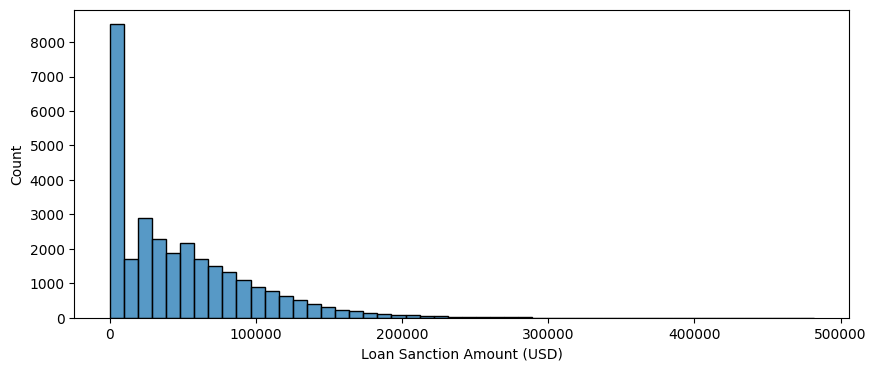


Histogram No Outlier:


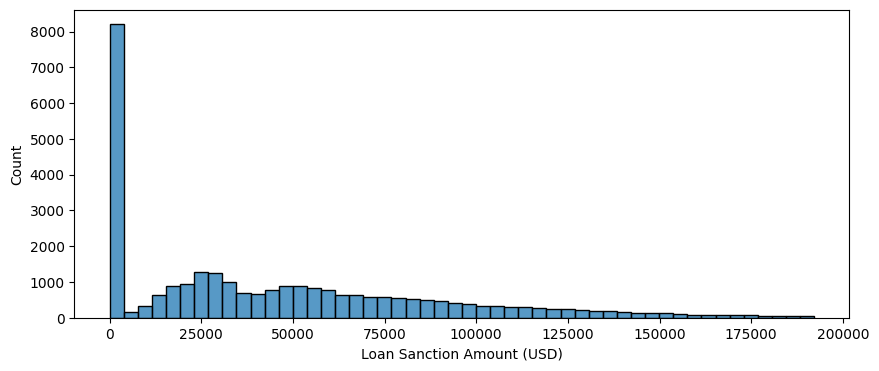

In [11]:
info_boxplot(db, 'Loan Sanction Amount (USD)', clean_outlier=True)

Cerca de 1.2% são outliers para a variável target.

In [12]:
outlier_limit = db['Loan Sanction Amount (USD)'].mean() + (3*db['Loan Sanction Amount (USD)'].std())

print('O dataset possui cerca de', db[db['Loan Sanction Amount (USD)'].abs() > outlier_limit]['Loan Sanction Amount (USD)'].value_counts().sum(), 'outliers')


O dataset possui cerca de 365 outliers


 Grande número de clientes com crédito negado (cerca de 27%).

In [13]:
print('Número de clientes com crédito NEGADO ou seja valor de concessão 0 ou -999(erro): ', db[db['Loan Sanction Amount (USD)'] <= 0].shape[0])
print('Número de clientes com crédito APROVADO ou seja valor de concessão > 0 : ', db[db['Loan Sanction Amount (USD)'] > 0].shape[0])

Número de clientes com crédito NEGADO ou seja valor de concessão 0 ou -999(erro):  8203
Número de clientes com crédito APROVADO ou seja valor de concessão > 0 :  21457


## Age

Description:
count   30,000.00
mean        40.09
std         16.05
min         18.00
25%         25.00
50%         40.00
75%         55.00
max         65.00
Name: Age, dtype: float64
**************************************************
Object type:
int64
**************************************************
Skewness:
0.046093801598670575
**************************************************
Boxplot:


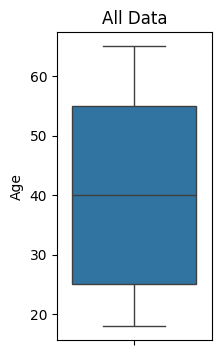

**************************************************
Histogram All Data:


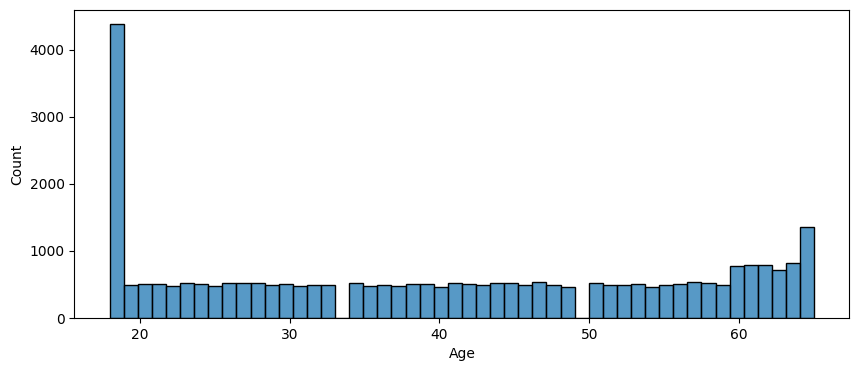

In [14]:
info_boxplot(db, 'Age')

 Grande quantidade de clientes com 18 e 65 anos.

In [15]:
print('Clientes com 18 ou 65 anos: ', db[(db['Age'] == 18) | (db['Age'] == 65)].shape[0], '(', db[(db['Age'] == 18) | (db['Age'] == 65)].shape[0]/db.shape[0] * 100, '%)')

Clientes com 18 ou 65 anos:  5727 ( 19.09 %)


## Co-Applicant

In [16]:
val_count_views(db['Co-Applicant'])

,perc,count
1,0.85,25516
0,0.15,4484


 Maior parte das solicitações possui Codevedor/"Co-solicitante".

## Credit Score

Description:
       all_data  no_outlier
count 28,297.00   28,297.00
mean     739.89      739.89
std       72.16       72.16
min      580.00      580.00
25%      681.88      681.88
50%      739.82      739.82
75%      799.12      799.12
max      896.26      896.26
**************************************************
Object type:
float64
**************************************************
Skewness:
   all_data  no_outlier
0     -0.02       -0.02
**************************************************
Boxplot:


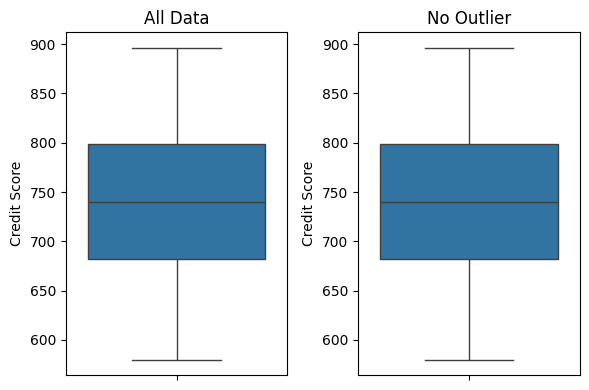

**************************************************
Histogram All Data:


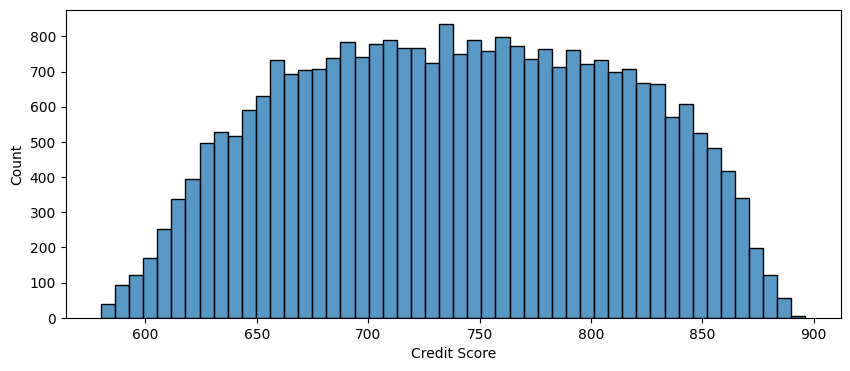


Histogram No Outlier:


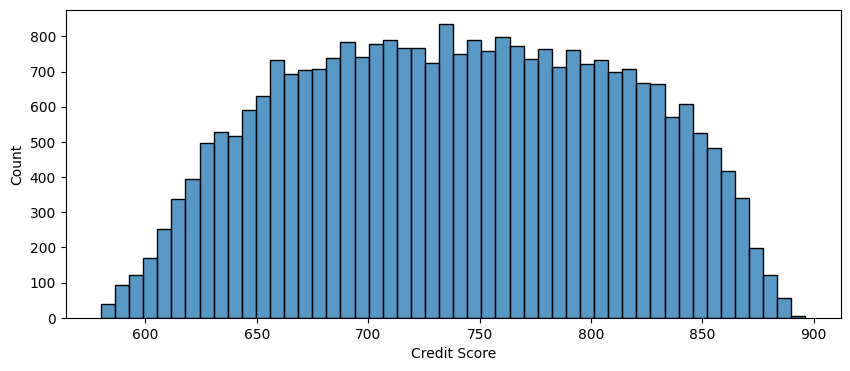

In [17]:
info_boxplot(db, 'Credit Score', clean_outlier=True)

## Current Loan Expenses

Description:
       all_data  no_outlier
count 29,828.00   29,558.00
mean     406.86      398.53
std      219.36      199.36
min        0.00        0.00
25%      247.67      246.47
50%      375.20      372.88
75%      521.29      516.03
max    3,840.88    1,063.60
**************************************************
Object type:
float64
**************************************************
Skewness:
   all_data  no_outlier
0      1.49        0.68
**************************************************
Boxplot:


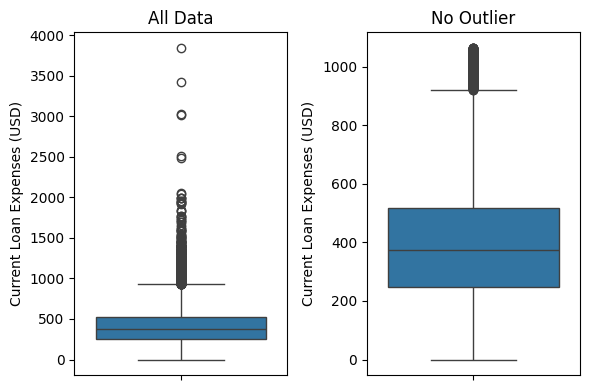

**************************************************
Histogram All Data:


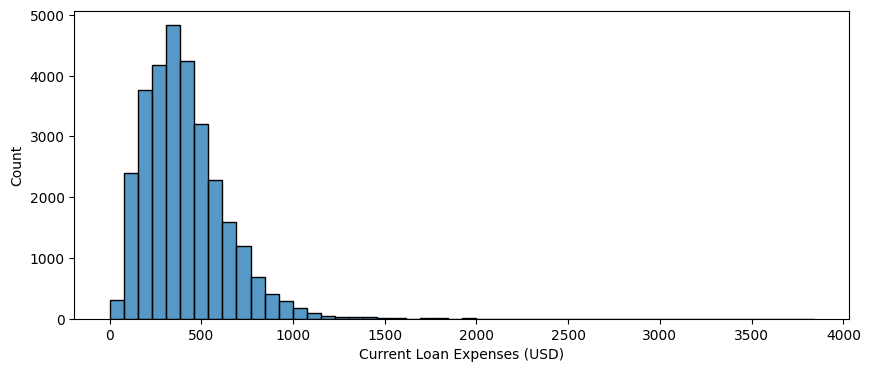


Histogram No Outlier:


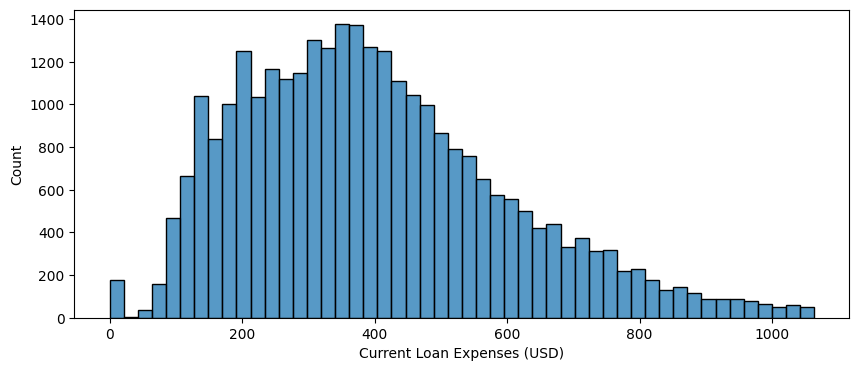

In [18]:
info_boxplot(db, 'Current Loan Expenses (USD)', clean_outlier=True)

 A feature possui dados com valores inválidos (-999) e outliers que foram definidos com valores acima de USD 1128.

## Dependents

Description:
       all_data  no_outlier
count 27,507.00   27,447.00
mean       2.25        2.24
std        0.95        0.93
min        1.00        1.00
25%        2.00        2.00
50%        2.00        2.00
75%        3.00        3.00
max       14.00        5.00
**************************************************
Object type:
float64
**************************************************
Skewness:
   all_data  no_outlier
0      0.80        0.63
**************************************************
Boxplot:


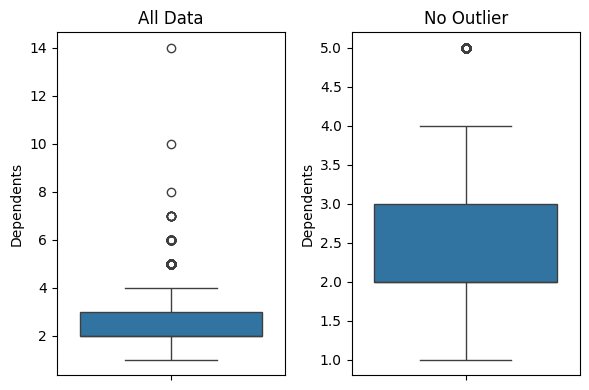

**************************************************
Histogram All Data:


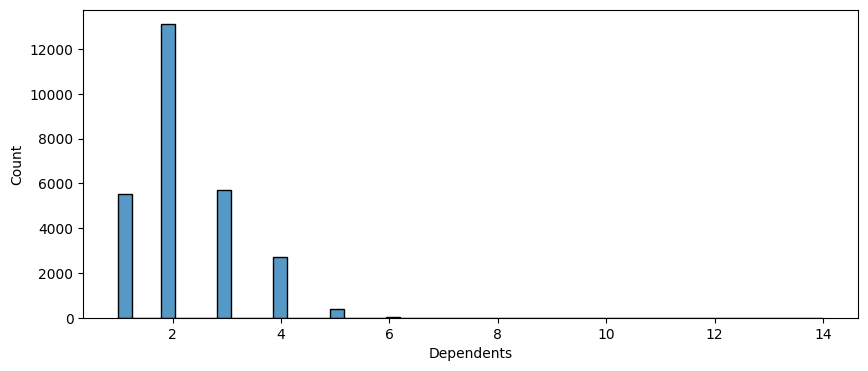


Histogram No Outlier:


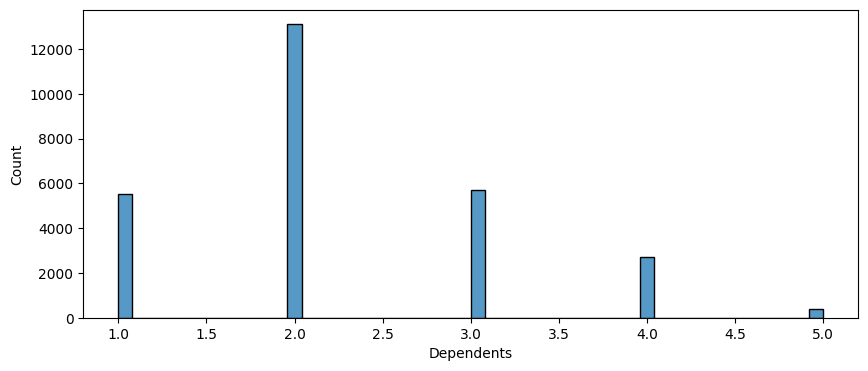

In [19]:
info_boxplot(db, 'Dependents', clean_outlier=True)

 Apresenta outliers pontuais, sendo o maior, um cliente com 14 dependentes.

## Expense Type 1

In [20]:
val_count_views(db['Expense Type 1'])

,perc,count
N,0.64,19214
Y,0.36,10786


## Expense Type 2

In [21]:
val_count_views(db['Expense Type 2'])

,perc,count
Y,0.67,20180
N,0.33,9820


## Gender

In [22]:
val_count_views(db['Gender'])

,perc,count
M,0.50,15053
F,0.50,14894
NaN,0.00,53


 Dataset com distribuição simétrica entre gêneros.

## Has Active Credit Card

In [23]:
val_count_views(db['Has Active Credit Card'])

,perc,count
Active,0.33,9771
Inactive,0.32,9466
Unpossessed,0.31,9197
NaN,0.05,1566


 Distribuição quase simétrica entre as categoricas.

## Income

Description:
          all_data  no_outlier
count    25,424.00   25,420.00
mean      2,630.57    2,552.19
std      11,262.72    1,476.97
min         377.70      377.70
25%       1,650.46    1,650.45
50%       2,222.43    2,222.34
75%       3,090.59    3,090.38
max   1,777,460.21   32,726.98
**************************************************
Object type:
float64
**************************************************
Skewness:
   all_data  no_outlier
0    154.00        4.08
**************************************************
Boxplot:


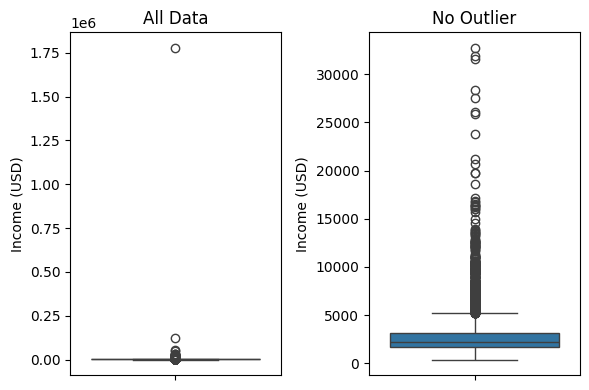

**************************************************
Histogram All Data:


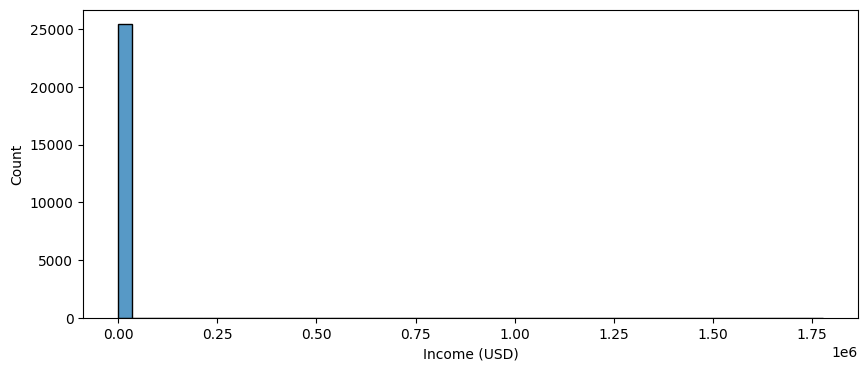


Histogram No Outlier:


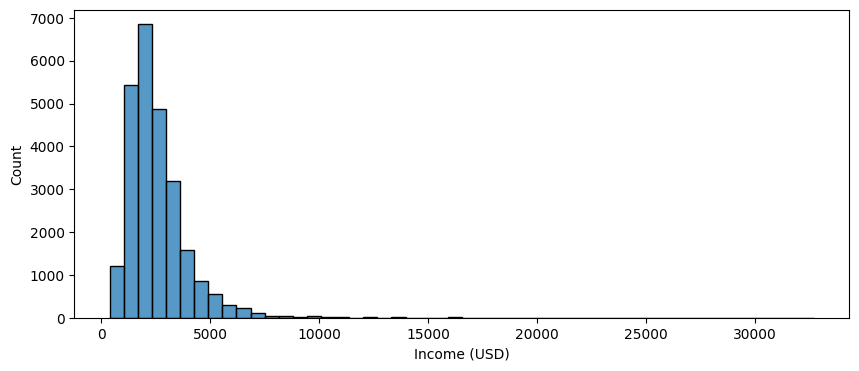

In [24]:
info_boxplot(db, 'Income (USD)', clean_outlier=True)

 A amostra apresenta média para renda em torno de USD 2.5k, porém um cliente apresenta renda acima de USD 1MM.

## Income Stability

In [25]:
val_count_views(db['Income Stability'])

,perc,count
Low,0.86,25751
High,0.09,2566
NaN,0.06,1683


 Predominância de Baixa estabilidade para a renda (86%).

## Location

In [26]:
val_count_views(db['Location'])

,perc,count
Semi-Urban,0.72,21563
Rural,0.18,5338
Urban,0.10,3099


 A maior parte dos clientes costuma viver em áreas mistas (semi-urbanas).

## Loan Amount Request

Description:
        all_data  no_outlier
count  30,000.00   29,606.00
mean   88,826.33   85,973.92
std    59,536.95   54,305.73
min     6,048.24    6,048.24
25%    41,177.76   40,948.94
50%    75,128.07   74,467.49
75%   119,964.60  117,625.53
max   621,497.82  267,264.81
**************************************************
Object type:
float64
**************************************************
Skewness:
   all_data  no_outlier
0      1.26        0.91
**************************************************
Boxplot:


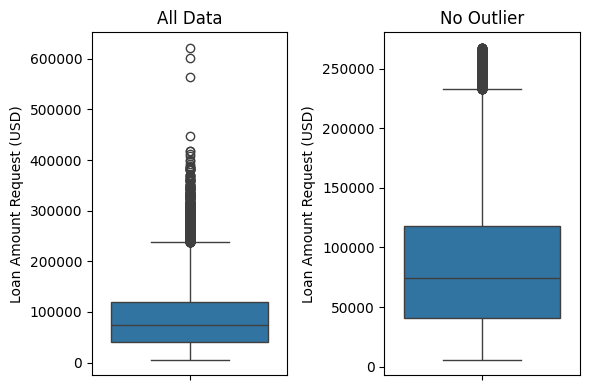

**************************************************
Histogram All Data:


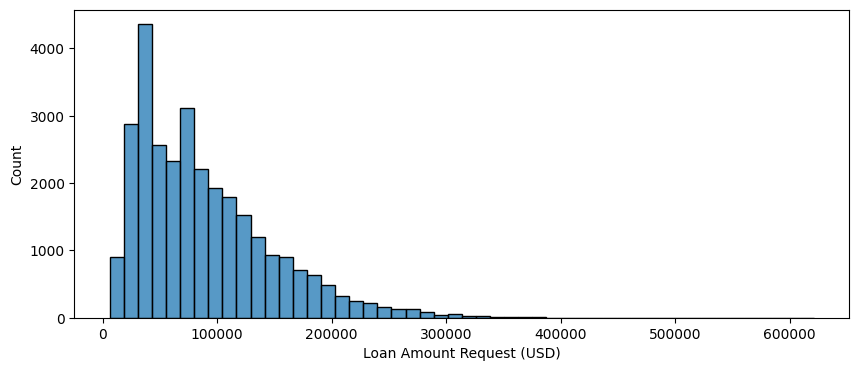


Histogram No Outlier:


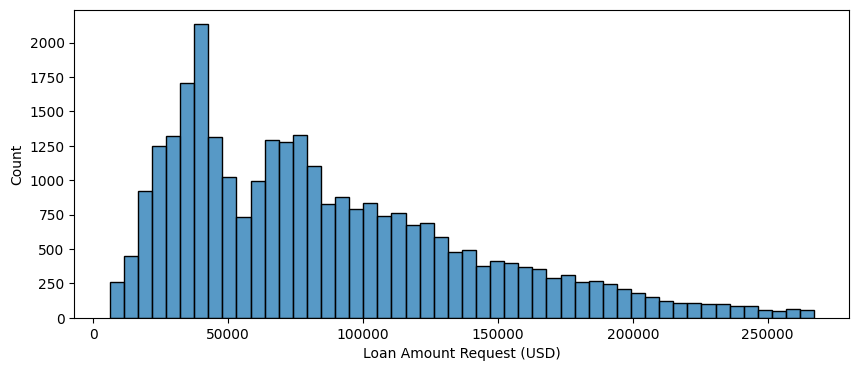

In [27]:
info_boxplot(db, 'Loan Amount Request (USD)', clean_outlier=True)

 Quantidade relevante de outliers que afetam a média (88k contra 85k).

## N Defaults

In [28]:
val_count_views(db['No. of Defaults'])

,perc,count
0,0.81,24182
1,0.19,5818


 19% dos clientes já incorreram em algum evento de default.

## Profession

In [29]:
val_count_views(db['Profession'])

,perc,count
Working,0.56,16926
Commercial associate,0.27,7962
Pensioner,0.09,2740
State servant,0.08,2366
Unemployed,0.00,2
Businessman,0.00,2
Student,0.00,1
Maternity leave,0.00,1


 Dataset contém a principal categoria (Working) com 56% da base de dados, pela nomenclatura genérica pode não possuir representação nas demais features.

## Property Type

In [30]:
val_count_views(db['Property Type'])

,perc,count
1,0.26,7863
2,0.26,7650
3,0.24,7309
4,0.24,7178


 Categorias distribuidas homogeneamente.

## Property Location

In [31]:
val_count_views(db['Property Location'])

,perc,count
Semi-Urban,0.35,10387
Rural,0.33,10041
Urban,0.31,9216
NaN,0.01,356


 Apesar dos clientes viverem majoritariamente em áreas Semi-Urbanas, os imóveis são distribuidos de forma homogênea. Uma das explicações seria, cliente possui imóvel porém vive em outro local.

## Property Age

Description:
          all_data  no_outlier
count    25,150.00   25,146.00
mean      2,631.12    2,551.88
std      11,322.68    1,475.56
min         377.70      377.70
25%       1,650.45    1,650.43
50%       2,223.25    2,223.09
75%       3,091.41    3,091.04
max   1,777,460.21   32,726.98
**************************************************
Object type:
float64
**************************************************
Skewness:
   all_data  no_outlier
0    153.22        4.10
**************************************************
Boxplot:


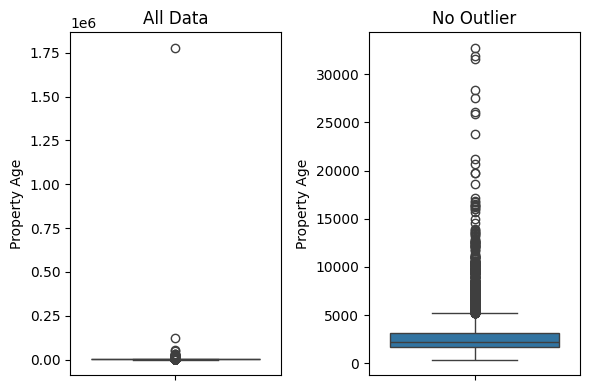

**************************************************
Histogram All Data:


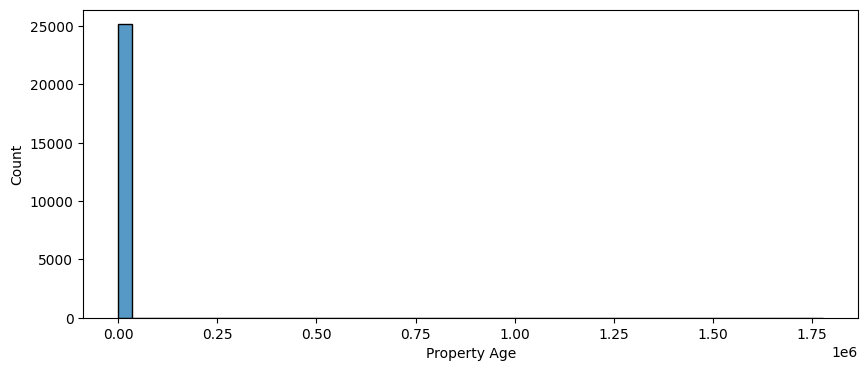


Histogram No Outlier:


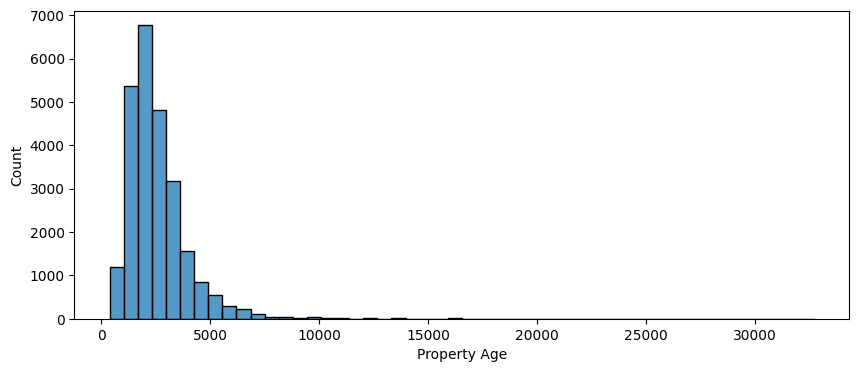

In [32]:
info_boxplot(db, 'Property Age', clean_outlier=True)

 Feature em dias de idade, apresenta imóvel com 1.7MM de dias ou seja 4.9k anos de idade. Podemos considerar como inválido.

## Property Price

Description:
          all_data  no_outlier
count    30,000.00   29,595.00
mean    131,771.40  126,928.64
std      93,532.97   83,942.94
min           0.00        0.00
25%      60,572.16   60,122.57
50%     109,993.61  108,600.66
75%     178,880.72  174,627.04
max   1,077,966.73  412,079.20
**************************************************
Object type:
float64
**************************************************
Skewness:
   all_data  no_outlier
0      1.42        0.95
**************************************************
Boxplot:


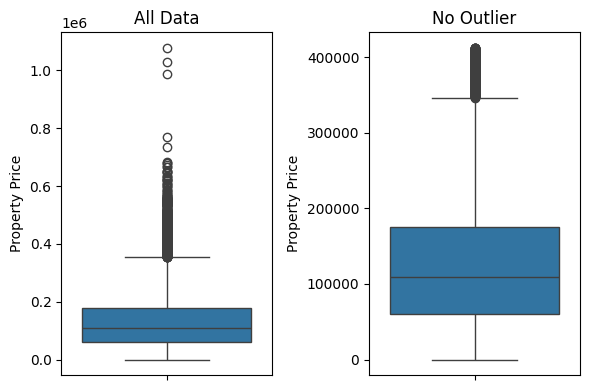

**************************************************
Histogram All Data:


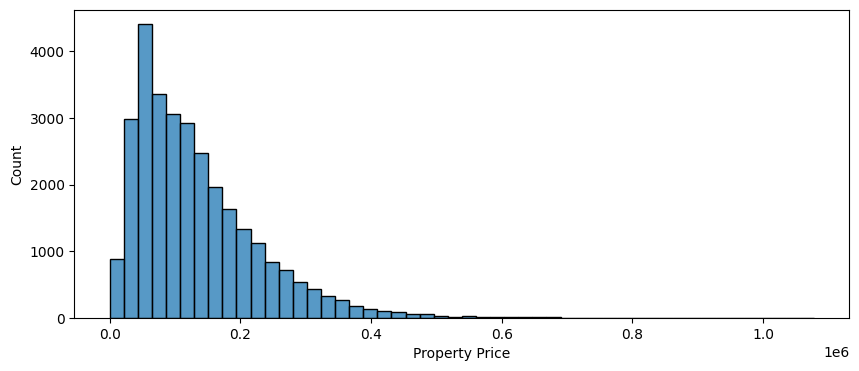


Histogram No Outlier:


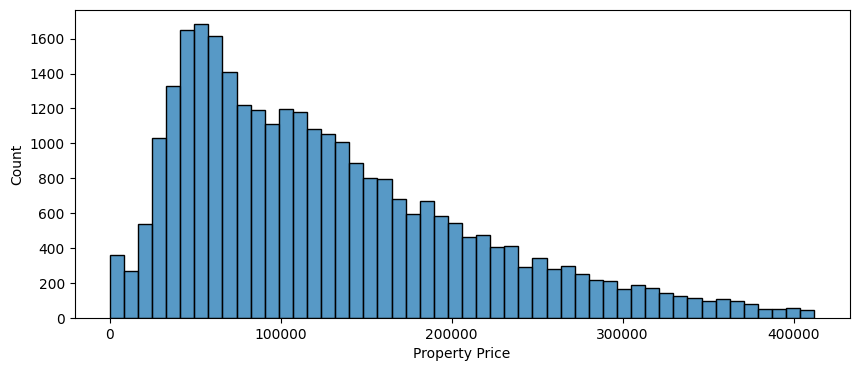

In [33]:
info_boxplot(db, 'Property Price', clean_outlier=True)

 Alguns clientes possuem imóveis com valores bastante elevados, considerados como outliers.

## Type of Employment

In [34]:
val_count_views(db['Type of Employment'])

,perc,count
NaN,0.24,7270
Laborers,0.19,5578
Sales staff,0.12,3736
Core staff,0.11,3230
Managers,0.08,2495
Drivers,0.05,1606
Accountants,0.05,1379
High skill tech staff,0.04,1307
Medicine staff,0.03,864
Security staff,0.02,579


In [35]:
print('Número de Missing: ', db['Type of Employment'].isnull().sum())

Número de Missing:  7270


 A feature poderia ser um complemento para a variável Profession, no entanto possui muitos valores nulos.

# Criando Features

 Cobertura por renda ou propriedade

In [36]:
db['CR_expenses'] = db['Current Loan Expenses (USD)'] / db['Income (USD)']
db['CR_loan'] = db['Loan Amount Request (USD)'] / db['Income (USD)']

# Numéricas vs Target


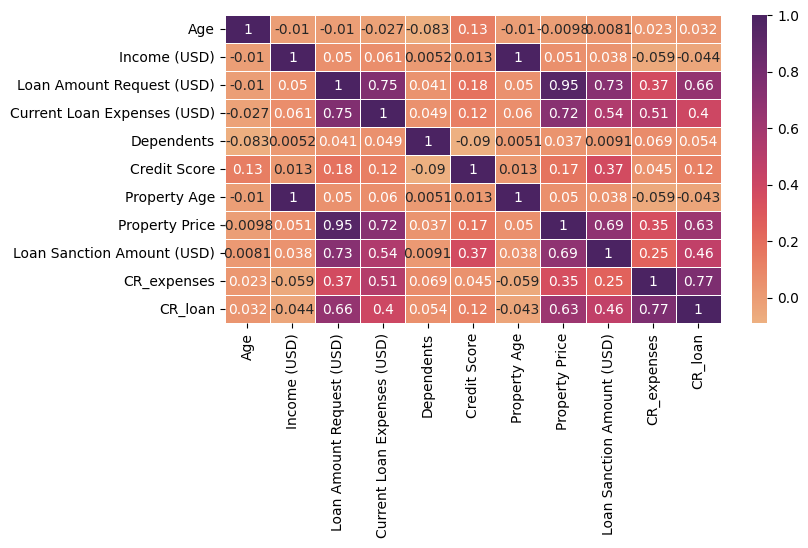

In [37]:
corr = db.drop(['No. of Defaults','Property Type','Co-Applicant', 'Property ID'],axis=1).corr()
fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(corr, annot=True, cmap='flare', linewidths=.5)
plt.show()

 As features com as maiores correlações são:
 - Loan Amount Request (73%)
 - Property Price (69%)
 - Current Loan Expenses (54%)
 - CR_loan "Loan Request / Income" (46%)
 - Credit Score (37%)
 - CR_expenses "Loan Expenses / Income" (25%)


# Categorical vs Target

## Co-Applicant

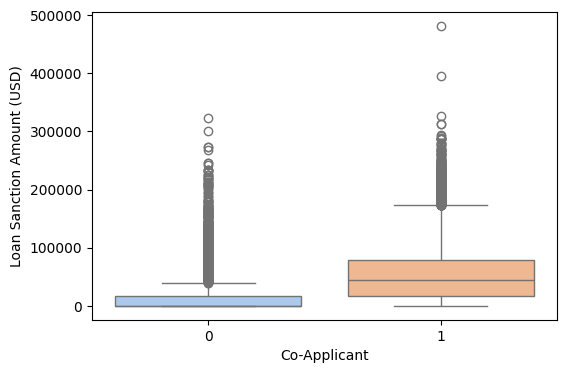

In [38]:
feature = 'Co-Applicant'
fig, axis = plt.subplots(figsize=(6,4))
db2 = db.copy()
db2[feature] = db2[feature].fillna('Unkown')
sns.boxplot(y=db2['Loan Sanction Amount (USD)'], x=db2[feature], palette='pastel')
plt.show()

 Clientes com Codevedor possui valores aprovados maiores, nota-se que a falta pode levar a negativa considerando valores médios mais próximos de 0.

## Expense Type 1

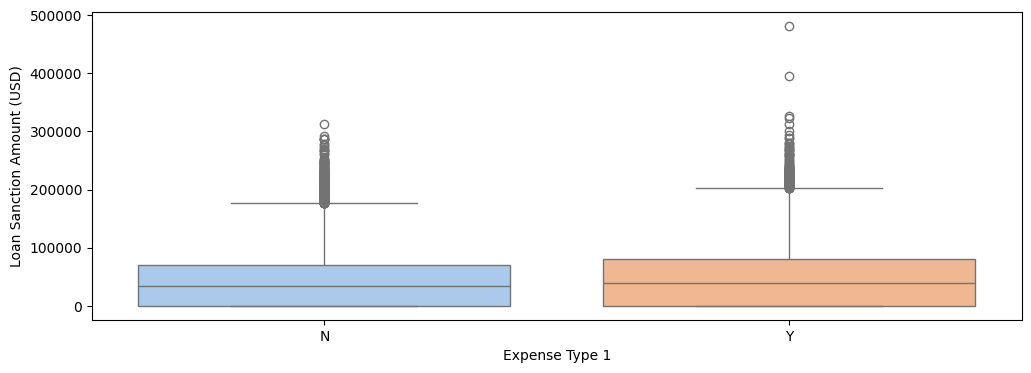

In [39]:
feature = 'Expense Type 1'
fig, axis = plt.subplots(figsize=(12,4))
db2 = db.copy()
db2[feature] = db2[feature].fillna('Unkown')
sns.boxplot(y=db2['Loan Sanction Amount (USD)'], x=db2[feature], palette='pastel')
plt.show()

## Expense Type 2

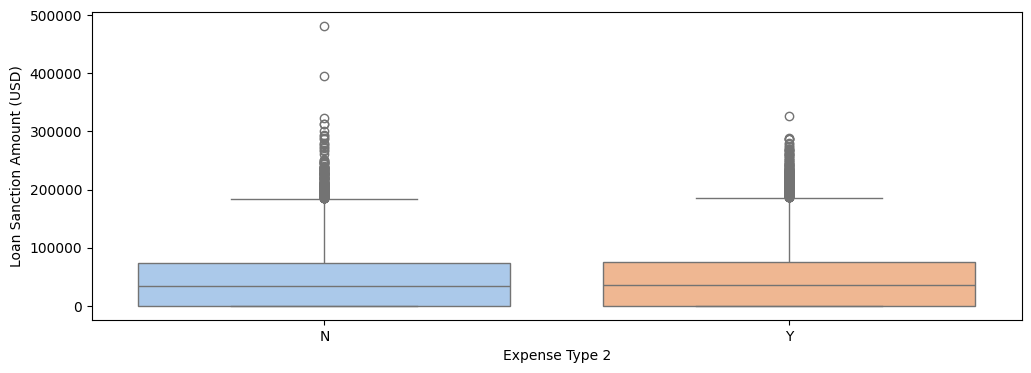

In [40]:
feature = 'Expense Type 2'
fig, axis = plt.subplots(figsize=(12,4))
db2 = db.copy()
db2[feature] = db2[feature].fillna('Unkown')
sns.boxplot(y=db2['Loan Sanction Amount (USD)'], x=db2[feature], palette='pastel')
plt.show()

## Gender

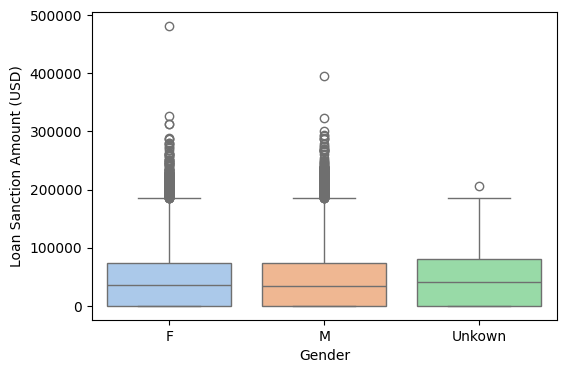

In [41]:
feature = 'Gender'
fig, axis = plt.subplots(figsize=(6,4))
db2 = db.copy()
db2[feature] = db2[feature].fillna('Unkown')
sns.boxplot(y=db2['Loan Sanction Amount (USD)'], x=db2[feature], palette='pastel')
plt.show()

## Has Active Credit Card

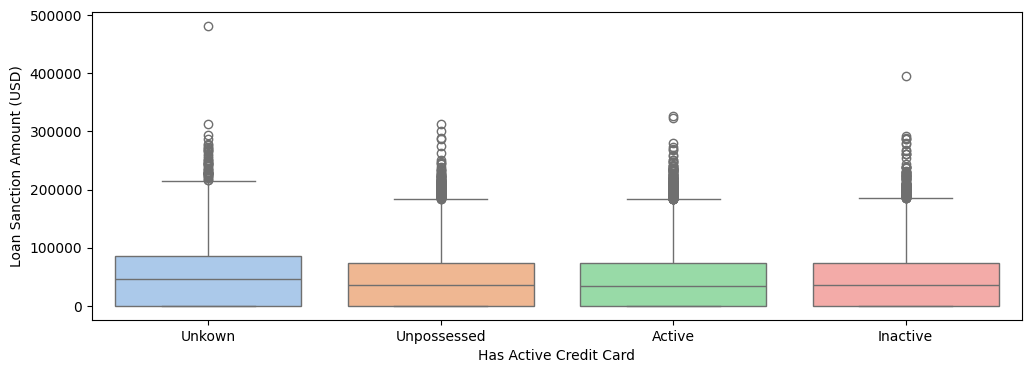

In [42]:
feature = 'Has Active Credit Card'
fig, axis = plt.subplots(figsize=(12,4))
db2 = db.copy()
db2[feature] = db2[feature].fillna('Unkown')
sns.boxplot(y=db2['Loan Sanction Amount (USD)'], x=db2[feature], palette='pastel')
plt.show()

## Income Stability

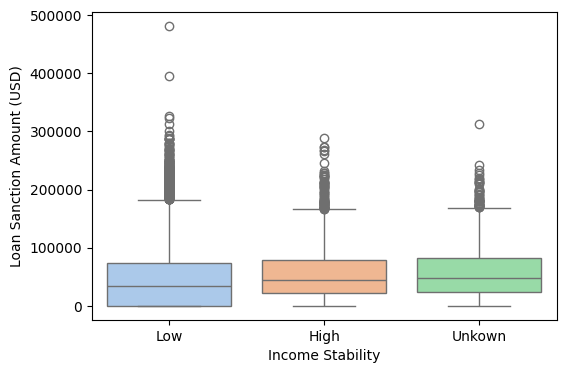

In [43]:
feature = 'Income Stability'
fig, axis = plt.subplots(figsize=(6,4))
db2 = db.copy()
db2[feature] = db2[feature].fillna('Unkown')
sns.boxplot(y=db2['Loan Sanction Amount (USD)'], x=db2[feature], palette='pastel')
plt.show()

 Clientes com maior estabilidade da renda tem valor médio da concessão maior.

## Location

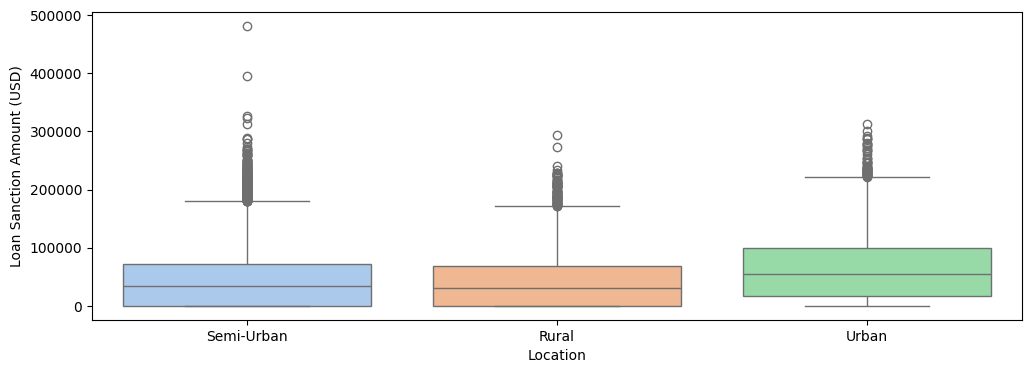

In [44]:
feature = 'Location'
fig, axis = plt.subplots(figsize=(12,4))
db2 = db.copy()
db2[feature] = db2[feature].fillna('Unkown')
sns.boxplot(y=db2['Loan Sanction Amount (USD)'], x=db2[feature], palette='pastel')
plt.show()

 Moradores de áreas Urbanas possuem maior média de valores concedidos.

## No. of Defaults

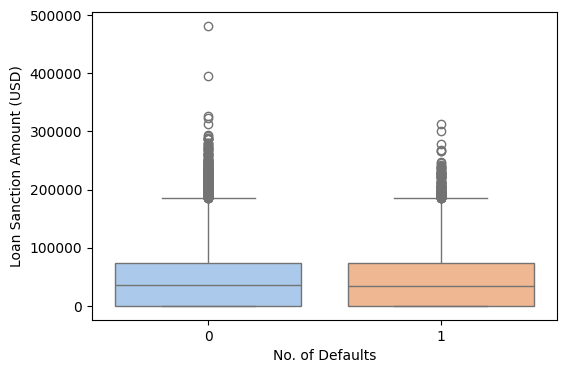

In [45]:
feature = 'No. of Defaults'
fig, axis = plt.subplots(figsize=(6,4))
db2 = db.copy()
db2[feature] = db2[feature].fillna('Unkown')
sns.boxplot(y=db2['Loan Sanction Amount (USD)'], x=db2[feature], palette='pastel')
plt.show()

## Property Type

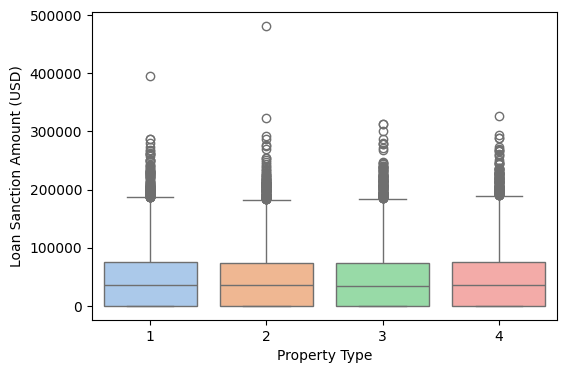

In [46]:
feature = 'Property Type'
fig, axis = plt.subplots(figsize=(6,4))
db2 = db.copy()
db2[feature] = db2[feature].fillna('Unkown')
sns.boxplot(y=db2['Loan Sanction Amount (USD)'], x=db2[feature], palette='pastel')
plt.show()

## Profession

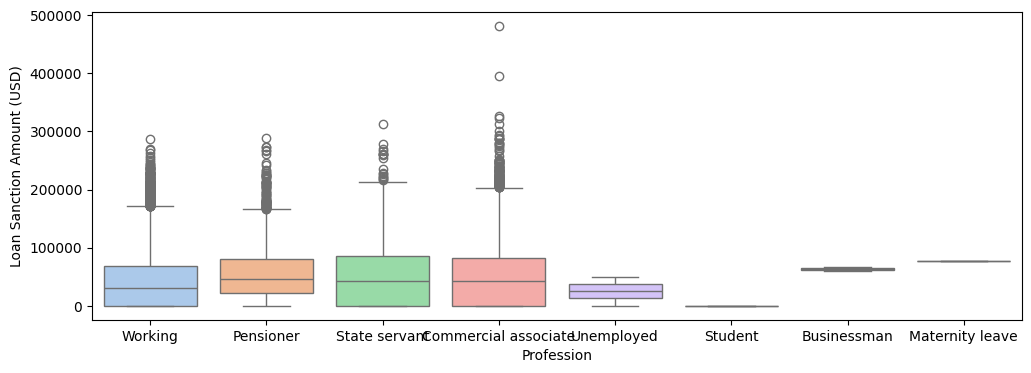

In [47]:
feature = 'Profession'
fig, axis = plt.subplots(figsize=(12,4))
db2 = db.copy()
db2[feature] = db2[feature].fillna('Unkown')
sns.boxplot(y=db2['Loan Sanction Amount (USD)'], x=db2[feature], palette='pastel')
plt.show()

## Type of Employment

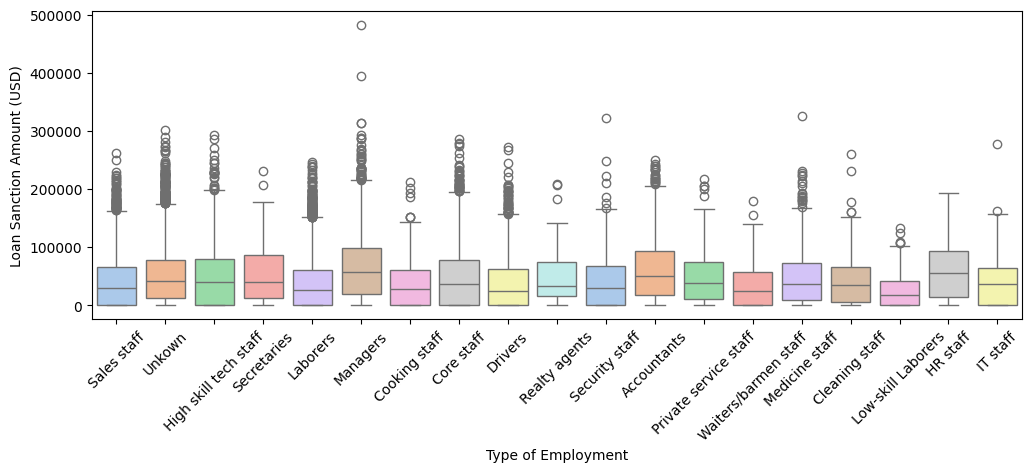

In [48]:
feature = 'Type of Employment'
fig, axis = plt.subplots(figsize=(12,4))
db2 = db.copy()
db2['Type of Employment'] = db2['Type of Employment'].fillna('Unkown')
sns.boxplot(y=db2['Loan Sanction Amount (USD)'], x=db2[feature], palette='pastel')
plt.xticks(rotation=45)
plt.show()

 Na média os maiores valores concedidos foram para os cargos de Manager, HR Staff e Accountants. <br>
 Consideramos a parcela de dados faltandes (24%) como 'Unknown'

# Data Preparation

In [49]:
df_train, df_test = train_test_split(db, random_state=42, test_size=0.2)

In [50]:
def data_prep(df):

    #Dropando colunas de ID
    df = df.drop(['Customer ID', 'Name', 'Property ID'], axis = 1)

    #Retirando outliers com base no desvio padrão da média.
    outlier_list = ['Income (USD)', 'Loan Amount Request (USD)','Current Loan Expenses (USD)','Dependents','Property Age','Property Price']

    for feature in outlier_list:
        outlier_limit = df[feature].mean() + (3 * df[feature].std())
        df = df[df[feature].abs() <= outlier_limit]

    #Dropando profissões com baixa relevância.
    profession_drop_list = ['Unemployed', 'Student', 'Businessman']

    df = df[~df['Profession'].isin(profession_drop_list)]

    #Inserindo valores de Moda para missing 
    fillna_list = ['Credit Score', 'Has Active Credit Card', 'Income Stability']
    for feature in fillna_list:
        df[feature] = df[feature].fillna(df[feature].mode()[0])

    #Criando categoria para clientes com tipo de emprego de valor missing.
    df['Type of Employment'] = df['Type of Employment'].fillna('Unknown')

    n_rows_ini = df.shape[0]
    #Dropando demais valores missing (quantidade sem relevância)
    df = df.dropna()
    print((n_rows_ini-df.shape[0]), ' rows lost in NA drop.')

    #One Hot Encoding
    ohe_list = ['Gender', 'Income Stability', 'Profession', 'Location', 'Expense Type 1', 'Expense Type 2', 'Has Active Credit Card', 'Property Location', 'Type of Employment']
    ohe = OneHotEncoder()
    ohe.fit(df[ohe_list])
    ohe_new_list = ohe.get_feature_names_out(ohe_list)
    df_ohe = pd.DataFrame(ohe.transform(df[ohe_list]).toarray(),columns=ohe_new_list,index=df.index)
    other_columns = [ft for ft in df.columns if ft not in ohe_list]
    df = pd.concat([df[other_columns], df_ohe],axis=1)

    #Min Max Scaler
    min_max_list = ['Age', 'Income (USD)', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)', 'Credit Score', 'Property Age', 'Property Price', 'CR_expenses', 'CR_loan']
    min_max_enc = MinMaxScaler()
    df[min_max_list] = min_max_enc.fit_transform(df[min_max_list])

    return df

In [51]:
print('Train')
df_train = data_prep(df_train)

X_train = df_train.loc[:, df_train.columns != 'Loan Sanction Amount (USD)']
y_train = df_train['Loan Sanction Amount (USD)']

print('Test')
df_test = data_prep(df_test)

X_test = df_test.loc[:, df_test.columns != 'Loan Sanction Amount (USD)']
y_test = df_test['Loan Sanction Amount (USD)']

Train
355  rows lost in NA drop.
Test
93  rows lost in NA drop.


# Treinamento

In [52]:
Regressors = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(random_state=42),
    'Lasso Regression': Lasso(random_state=42),
    'Elastic Net Regression': ElasticNet(random_state=42),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Random Forest Regression': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=42)
}

In [53]:
def score_model(model,model_key, X_train, y_train):
    
    score = cross_validate(model, X_train, y_train, cv=5, scoring=['r2','neg_mean_squared_error','neg_mean_absolute_error', 'neg_median_absolute_error', 'max_error'], n_jobs=-1)

    r2 = score['test_r2'].mean()

    neg_mse = score['test_neg_mean_squared_error']
    rmse = np.sqrt(-neg_mse).mean()

    neg_mae =  score['test_neg_mean_absolute_error']
    mae = -(neg_mae.mean())

    neg_medae =  score['test_neg_median_absolute_error']
    medae = -(neg_medae.mean())

    me =  score['test_max_error']
    me = (me.mean())

    d = {'model_key': [model_key], 'r2': [r2], 'rmse':[rmse], 'mae':[mae], 'medae':[medae]}

    df_temp = pd.DataFrame(d)

    return df_temp

In [54]:
def test_results(model,model_key, X_train, y_train, X_test, y_test):
    
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)

    y_predict = [0 if x < 0 else x for x in y_predict]

    r2 = metrics.r2_score(y_test, y_predict)
    rmse = metrics.mean_squared_error(y_test, y_predict, squared=False)
    mae = metrics.mean_absolute_error(y_test, y_predict)
    medae = metrics.median_absolute_error(y_test, y_predict)
    me = metrics.max_error(y_test, y_predict)

    residuals = y_test.values - y_predict

    d = {'model_key': [model_key], 'r2': [r2], 'rmse':[rmse], 'mae':[mae], 'medae':[medae], 'me': [me], 'y_predict': [y_predict], 'residuals': [residuals], 'model': [model]}

    df_temp = pd.DataFrame(d)

    return df_temp

In [55]:
def score_classification_model(model, model_key, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    
    y_proba_train = model.predict_proba(X_train)
    y_proba_train = [x[1] for x in y_proba_train]
    
    y_proba_test = model.predict_proba(X_test)
    y_proba_test = [x[1] for x in y_proba_test]

    accuracy = metrics.accuracy_score(y_test, y_pred)
    balanced_accuracy = metrics.balanced_accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
    f1 = metrics.f1_score(y_test, y_pred)
    roc_auc = metrics.roc_auc_score(y_test, y_pred)

    d = {'model_key': [model_key], 'accuracy': [accuracy], 'balanced_accuracy':[balanced_accuracy], 'precision':[precision], 'recall':[recall], 'specificity': [specificity], 'f1': [f1], 'roc_auc': [roc_auc], 'y_pred' : [y_pred], 'y_proba_train':[y_proba_train], 'y_proba_test': [y_proba_test], 'model': [model]}

    df_temp = pd.DataFrame(d)

    return df_temp

In [56]:
i=0
for model_key in Regressors:

  model = Regressors[model_key]

  df_temp = score_model(model, model_key, X_train, y_train)

  if i != 0:
    df_model = pd.concat([df_model, df_temp], axis = 0)
  else:
    df_model = df_temp.copy()

  i+=1

df_model = df_model.sort_values(by='r2', ascending=False).reset_index(drop=True)
print(df_model.to_string())

                      model_key   r2      rmse       mae     medae
0  Gradient Boosting Regression 0.70 23,262.69 14,119.35  8,573.14
1      Random Forest Regression 0.69 23,385.79 12,894.65  6,156.51
2              Lasso Regression 0.57 27,640.76 19,957.12 14,469.80
3              Ridge Regression 0.57 27,642.70 19,962.27 14,471.48
4             Linear Regression 0.57 27,650.88 19,971.56 14,534.43
5      Decision Tree Regression 0.39 33,016.22 15,150.67  2,340.54
6        Elastic Net Regression 0.19 37,901.32 30,895.55 29,936.92


# Teste

In [57]:
model_key = df_model.iloc[0]['model_key']
model = Regressors[model_key]

df_model = test_results(model,model_key, X_train, y_train, X_test, y_test)

print(df_model.to_string())

                      model_key   r2      rmse       mae    medae         me                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

# Análise dos Resíduos

 Verificamos que para casos onde o crédito foi negado, a regressão tende a apresentar os maiores erros.

<AxesSubplot: xlabel='Loan Sanction Amount (USD)'>

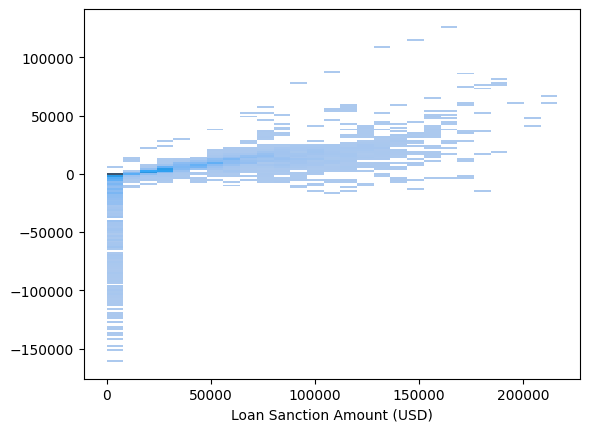

In [58]:
sns.histplot(x=y_test, y=df_model['residuals'][0])

 Treinaremos o modelo de classificação para predizer a negativa da concessão de crédito. <br>
Na amostra de treino, se a o valor da concessão foi maior que 0 será considerado como aprovado.

In [59]:
Classificators =  modelos = {
      'Logistic Regression': LogisticRegression(),
      'Random Forest': RandomForestClassifier(random_state=42),
      'Gradient Boosting': GradientBoostingClassifier(random_state=42),
      'Decision Tree Classifier': DecisionTreeClassifier(random_state=42)
}

In [ ]:
#Retiramos a feature do valor concedido dado que será a target no modelo de regressão.

df_train_class = df_train.copy()
df_train_class['credito_aprovado'] = 0
df_train_class.loc[df_train_class['Loan Sanction Amount (USD)'] > 0, 'credito_aprovado'] = 1

X_train_class = df_train_class.loc[:, df_train_class.drop(['Loan Sanction Amount (USD)', 'credito_aprovado'], axis = 1).columns]
y_train_class = df_train_class['credito_aprovado']

df_test_class = df_test.copy()
df_test_class['credito_aprovado'] = 0
df_test_class.loc[df_test_class['Loan Sanction Amount (USD)'] > 0, 'credito_aprovado'] = 1

X_test_class = df_test_class.loc[:, df_test_class.drop(['Loan Sanction Amount (USD)', 'credito_aprovado'], axis = 1).columns]
y_test_class = df_test_class['credito_aprovado']

In [60]:
i=0

for model_key in Classificators:

  model = Classificators[model_key]

  df_temp = score_classification_model(model, model_key, X_train_class, y_train_class, X_test_class, y_test_class)

  if i != 0:
    df_class = pd.concat([df_class, df_temp], axis = 0)
  else:
    df_class = df_temp.copy()

  i+=1

df_class = df_class.sort_values(by='roc_auc', ascending=False)
print(df_class.to_string())

                  model_key  accuracy  balanced_accuracy  precision  recall  specificity   f1  roc_auc                                                                                                                                                                                                                                                                                                             y_pred                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [61]:
X_train = df_train_class.loc[:, df_train_class.columns != 'Loan Sanction Amount (USD)']
y_train = df_train_class['Loan Sanction Amount (USD)']

X_test['credito_aprovado'] = df_class.iloc[0]['y_pred']

In [62]:
i=0
for model_key in Regressors:

  model = Regressors[model_key]

  df_temp = score_model(model, model_key, X_train, y_train)

  if i != 0:
    df_model_train = pd.concat([df_model_train, df_temp], axis = 0)
  else:
    df_model_train = df_temp.copy()

  i+=1

df_model_train = df_model_train.sort_values(by='r2', ascending=False).reset_index(drop=True)
print(df_model_train.to_string())

                      model_key   r2      rmse       mae     medae
0  Gradient Boosting Regression 0.99  3,416.36  2,025.84  1,079.58
1      Random Forest Regression 0.99  3,501.81  1,965.08    991.81
2      Decision Tree Regression 0.99  4,777.56  2,439.56    427.27
3              Lasso Regression 0.83 17,388.07 12,886.99 10,088.86
4              Ridge Regression 0.83 17,390.01 12,898.60 10,108.52
5             Linear Regression 0.83 17,407.20 12,906.49 10,130.42
6        Elastic Net Regression 0.38 33,100.89 26,639.35 23,576.36


 Testaremos o modelo com a nova feature mesmo apresentando sinais de overfitting.

In [63]:
model_key = df_model_train.iloc[0]['model_key']
model = Regressors[model_key]

df_model_test = test_results(model,model_key, X_train, y_train, X_test, y_test)

print(df_model_test.to_string())

                      model_key   r2      rmse      mae    medae         me                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

 Notamos melhora na métrica de Mean Absolute Error que tem redução de 35% e Median Absolute Error com redução de 80%.

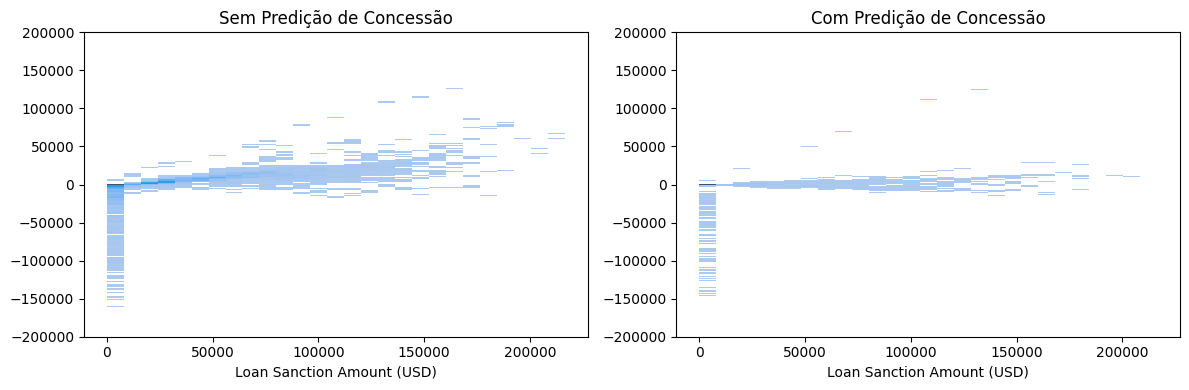

In [68]:
fig, axis = plt.subplots(ncols=2, figsize=(12,4))
sns.histplot(x=y_test, y=df_model['residuals'][0], ax=axis[0])
sns.histplot(x=y_test, y=df_model_test['residuals'][0], ax=axis[1])
axis[0].set_title('Sem Predição de Concessão')
axis[0].set_ylim([-200000,200000])
axis[1].set_title('Com Predição de Concessão')
axis[1].set_ylim([-200000,200000])
fig.tight_layout()
plt.show()

Avaliando os resíduos acima verificamos que houve redução na variância do erro, o que é benéfico para o resultado esperado.

## Hyperparameter Tuning

In [84]:
# Testes Anteriores
# parameters = {
#     'n_estimators':[300, 200, 100,50],
#     'max_depth':[12, 6 , 3],
#     'loss':['squared_error', 'absolute_error','huber', 'quantile'],
#     'learning_rate':[0.01, 0.1, 1],
#     'min_samples_split':[10, 5, 2],
#     'max_features':['auto','sqrt', None]
#     }

parameters = {
    'n_estimators':[200],
    'max_depth':[6],
    'loss':['absolute_error'],
    'learning_rate':[0.1],
    'min_samples_split':[10],
    'max_features':['auto']
    }


rand_search = GridSearchCV(GradientBoostingRegressor(random_state=42), parameters, scoring='neg_mean_absolute_error', n_jobs=-1, cv=3, verbose=10, return_train_score=True)
rand_search.fit(X_train, y_train)

best_model = rand_search.best_estimator_
rand_res = rand_search.cv_results_

print(best_model.get_params())

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'absolute_error', 'max_depth': 6, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [97]:
y_predict = best_model.predict(X_test)

r2 = metrics.r2_score(y_test, y_predict)
rmse = metrics.mean_squared_error(y_test, y_predict, squared=False)
mae = metrics.mean_absolute_error(y_test, y_predict)
medae = metrics.median_absolute_error(y_test, y_predict)

residuals = y_test - y_predict

d = {'model_key': ['Gradient Boosting Regressor'], 'r2': [r2], 'rmse':[rmse], 'mae':[mae], 'medae':[medae], 'y_pred': [y_predict], 'y_true': [y_test.values], 'residuals' : [residuals.values]}

df_tuned = pd.DataFrame(d)
print(df_tuned.to_string())

                     model_key   r2      rmse      mae    medae                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

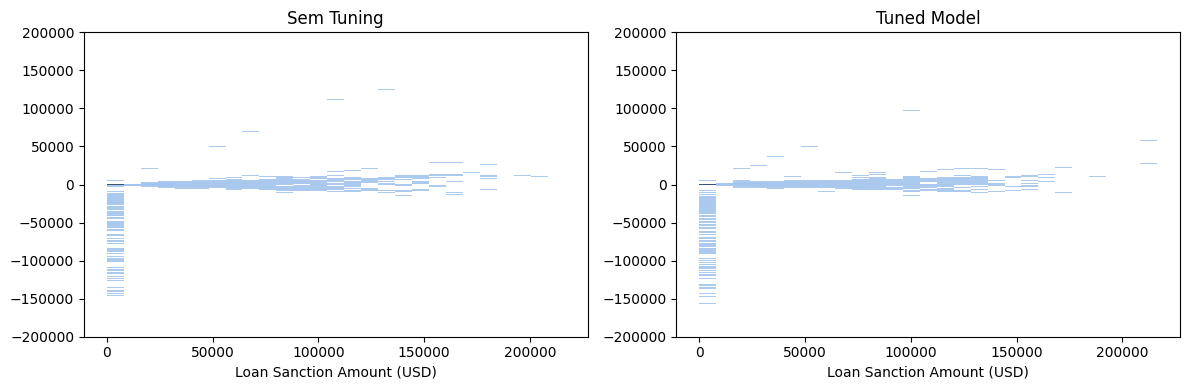

In [98]:
fig, axis = plt.subplots(ncols=2, figsize=(12,4))
sns.histplot(x=y_test, y=df_model_test['residuals'][0], ax=axis[0])
sns.histplot(x=y_test, y=df_tuned['residuals'][0], ax=axis[1])
axis[0].set_title('Sem Tuning')
axis[0].set_ylim([-200000,200000])
axis[1].set_title('Tuned Model')
axis[1].set_ylim([-200000,200000])
fig.tight_layout()
plt.show()

# Feature Importances

                     model_key                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

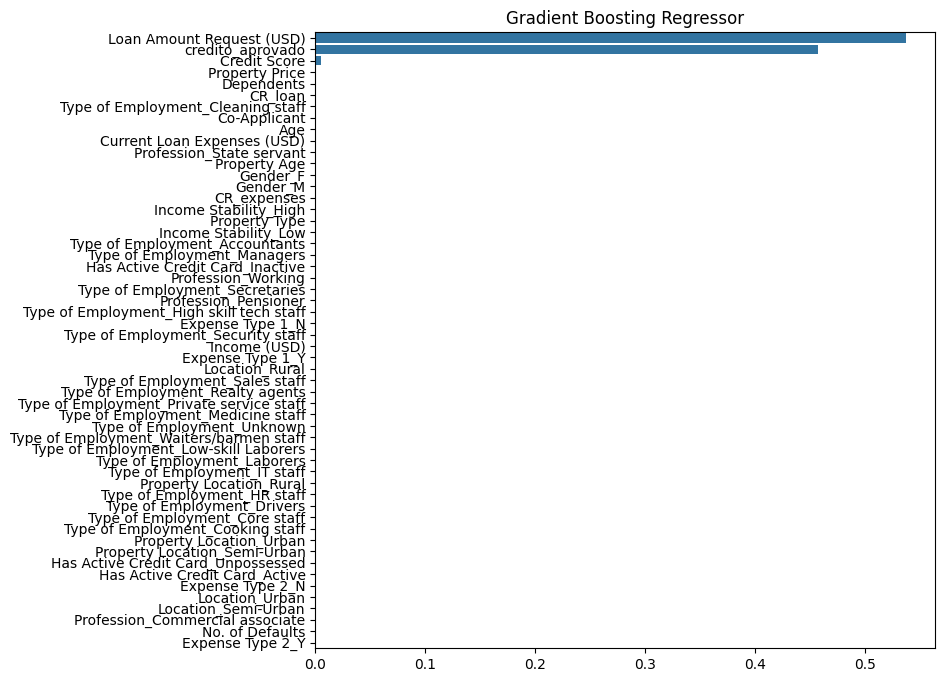

In [121]:
model_key = 'Gradient Boosting Regressor'
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

feat_names = model.feature_names_in_
importances = model.feature_importances_

d = {'feature': feat_names, 'importances': abs(importances), 'raw_importances' : importances}

df_temp = pd.DataFrame(d).sort_values(by='importances', ascending=False)

d = {'model_key': [model_key], 'feature': [df_temp['feature'].values], 'importances': [df_temp['importances'].values], 'raw_importances' : [df_temp['raw_importances'].values], 'model': [model]}

df_importances = pd.DataFrame(d)

print(df_importances.to_string())

fig, axis = plt.subplots(figsize=(8,8))
sns.barplot(x=df_importances['raw_importances'][0], y=df_importances['feature'][0])
plt.title(model_key)
plt.show()

 Testando N features para o modelo com melhor score.

In [122]:
for i in range(1,11):

  top_features = df_importances.loc[df_importances['model_key'] == df_tuned.iloc[0]['model_key']]['feature'][0][:i]

  model = GradientBoostingRegressor(random_state=42)

  df_temp = score_model(model, model_key, X_train[top_features], y_train)
  df_temp['n_features'] = i
  df_temp['features'] = [top_features]
  df_temp['model'] = [model]

  if i != 1:
    df_top_features_model = pd.concat([df_top_features_model, df_temp], axis = 0)
  else:
    df_top_features_model = df_temp.copy() 

df_top_features_model = df_top_features_model.sort_values(by='mae', ascending=True).reset_index(drop=True)
print(df_top_features_model.to_string())

                     model_key   r2      rmse       mae     medae  n_features                                                                                                                                                                             features                                       model
0  Gradient Boosting Regressor 0.99  3,420.63  2,014.00  1,065.79           3                                                                                                                          [Loan Amount Request (USD), credito_aprovado, Credit Score]  GradientBoostingRegressor(random_state=42)
1  Gradient Boosting Regressor 0.99  3,408.47  2,020.59  1,076.69           4                                                                                                          [Loan Amount Request (USD), credito_aprovado, Credit Score, Property Price]  GradientBoostingRegressor(random_state=42)
2  Gradient Boosting Regressor 0.99  3,411.45  2,021.96  1,072.89           9              

In [123]:
model_key = 'Gradient Boosting Regressor'
model = GradientBoostingRegressor(**parameters)

top_feature_names = df_top_features_model.iloc[0]['features']

df_top_feature = test_results(model,model_key, X_train[top_feature_names], y_train, X_test[top_feature_names], y_test)

print(df_top_feature.to_string())

                     model_key   r2      rmse      mae    medae         me                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

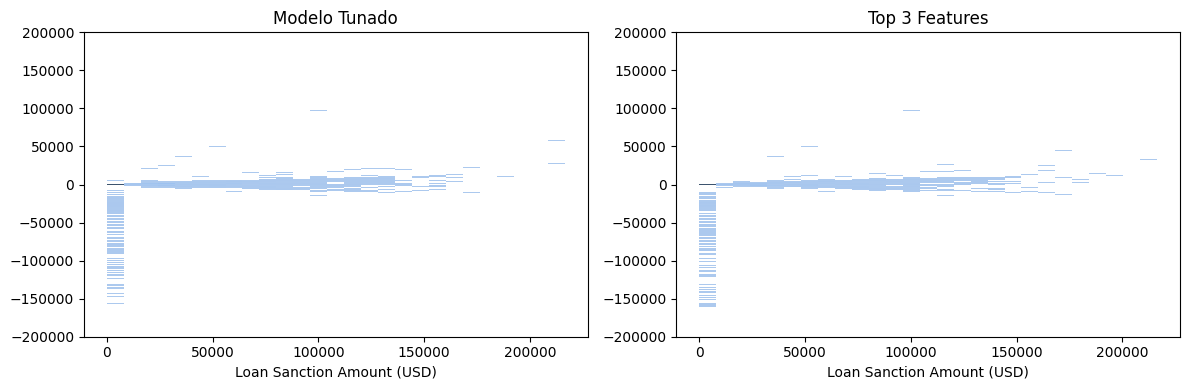

In [129]:
fig, axis = plt.subplots(ncols=2, figsize=(12,4))
sns.histplot(x=y_test, y=df_tuned['residuals'][0], ax=axis[0])
sns.histplot(x=y_test, y=df_top_feature['residuals'][0], ax=axis[1])
axis[0].set_title('Todas as Features')
axis[0].set_ylim([-200000,200000])
axis[1].set_title('Top '+str(len(top_feature_names))+' Features')
axis[1].set_ylim([-200000,200000])
fig.tight_layout()
plt.show()

## Hyperparameter Tuning

In [132]:
# Testes Anteriores
# parameters = {
#     'n_estimators':[300, 200, 100,50],
#     'max_depth':[12, 6 , 3],
#     'loss':['squared_error', 'absolute_error','huber', 'quantile'],
#     'learning_rate':[0.01, 0.1, 1],
#     'min_samples_split':[10, 5, 2],
#     'max_features':['auto','sqrt', None]
#     }

parameters = {
    'n_estimators':[300],
    'max_depth':[6],
    'loss':['squared_error', 'absolute_error','huber', 'quantile'],
    'learning_rate':[0.1],
    'min_samples_split':[5],
    'max_features':['auto']
    }


rand_search = GridSearchCV(GradientBoostingRegressor(random_state=42), parameters, scoring='neg_mean_absolute_error', n_jobs=4, cv=3, verbose=10, return_train_score=True)
rand_search.fit(X_train[top_feature_names], y_train)

best_model = rand_search.best_estimator_
rand_res = rand_search.cv_results_

print(best_model.get_params())

Fitting 3 folds for each of 1296 candidates, totalling 3888 fits
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'absolute_error', 'max_depth': 6, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [133]:
y_predict = best_model.predict(X_test[top_feature_names])

r2 = metrics.r2_score(y_test, y_predict)
rmse = metrics.mean_squared_error(y_test, y_predict, squared=False)
mae = metrics.mean_absolute_error(y_test, y_predict)
medae = metrics.median_absolute_error(y_test, y_predict)

residuals = y_test - y_predict

d = {'model_key': ['Gradient Boosting Regressor'], 'r2': [r2], 'rmse':[rmse], 'mae':[mae], 'medae':[medae], 'y_pred': [y_predict], 'y_true': [y_test.values], 'residuals' : [residuals.values]}

df_tuned = pd.DataFrame(d)
print(df_tuned.to_string())

                     model_key   r2      rmse      mae    medae                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

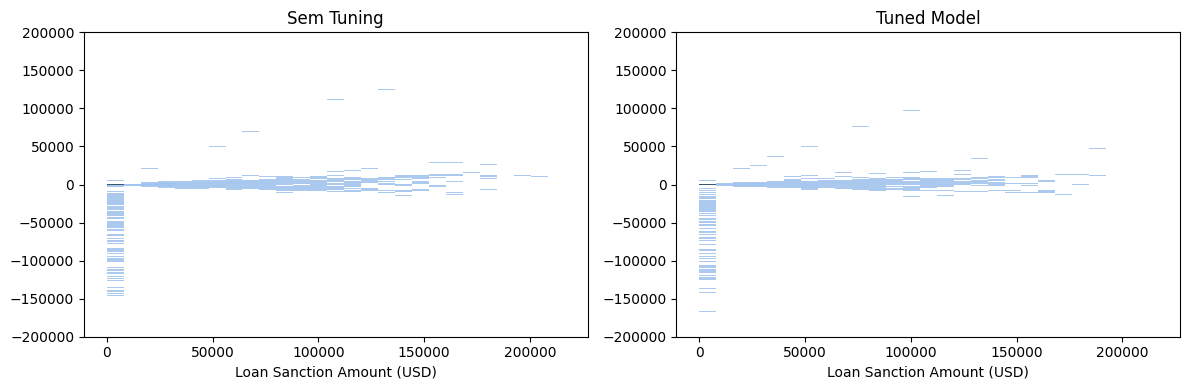

In [134]:
fig, axis = plt.subplots(ncols=2, figsize=(12,4))
sns.histplot(x=y_test, y=df_model_test['residuals'][0], ax=axis[0])
sns.histplot(x=y_test, y=df_tuned['residuals'][0], ax=axis[1])
axis[0].set_title('Sem Tuning')
axis[0].set_ylim([-200000,200000])
axis[1].set_title('Tuned Model')
axis[1].set_ylim([-200000,200000])
fig.tight_layout()
plt.show()

# Conclusão

A priori este projeto buscava predizer o valor das concessões de crédito com base em features que representam algumas de suas características. <br>
Ao verificarmos a variável target `Loan Sanction Amount (USD)` identificamos cerca de 1/3 da base de dados com valor zero, ou seja, concessão de crédito negada. <br>

Dados numerosos nesta categoria distorcem a regressão, onde os pesos das variáveis independentes podem não fazer sentido no cenário onde o crédito não é concedido. <br>
Incluímos portanto a feature `credito_aprovado` que é resultado de um modelo de classificação que utiliza as mesmas features para retornar se o crédito será concedido ou não. <br>

O teste do modelo retornou resultados animadores: <br>

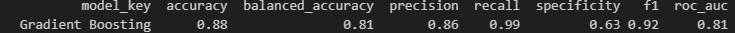

Avaliando a dispersão dos erros no modelo de regressão, temos erros menos concentrados em crédito negado e também uma variância menor nas demais predições.<br>

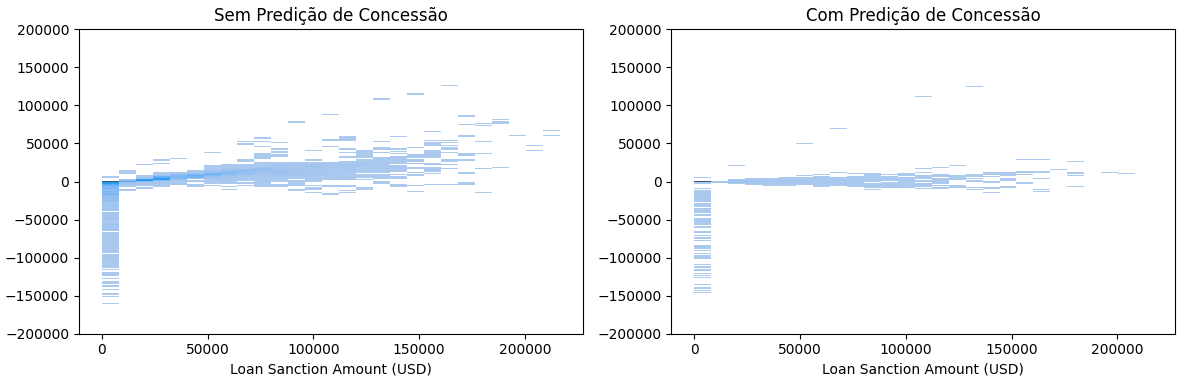

O modelo final possui as seguintes métricas:
 - R2: 67%
 - RMSE: 24.394,93
 - MAE: 9.007,96
 - MEDAE: 1.622,06

Como principais features temos `credito_aprovado`, `Loan Amount Request (USD)` e `Credit Score`. Confirmando a tese inicial de que os valores concedidos são diretamente relacionados ao valor solicitado, que pode sofrer redução ou mesmo negativa na concessão.

